Saving Housing.csv to Housing (2).csv
Starting Normalization
Best Normalization Alpha: 0.1 | Final Validation Cost: 757587417934.863037

MODEL COEFFICIENTS (NORMALIZATION):
 Intercept (θ0) : 2248191.75267363
 area           : 4332341.37951607
 bedrooms       : 1172897.86882077
 bathrooms      : 3312991.63727958
 stories        : 1573877.25456812
 parking        : 1196099.33864731
Starting Standardization
Best Standardization Alpha: 0.01 | Final Validation Loss: 767002482214.219849

OPTIMAL MODEL COEFFICIENTS (STANDARDIZATION):
  Intercept (θ0) : 4770634.25586332
  area           : 737970.09077758
  bedrooms       : 134448.45575050
  bathrooms      : 596923.49259241
  stories        : 442865.00132939
  parking        : 297178.08148581


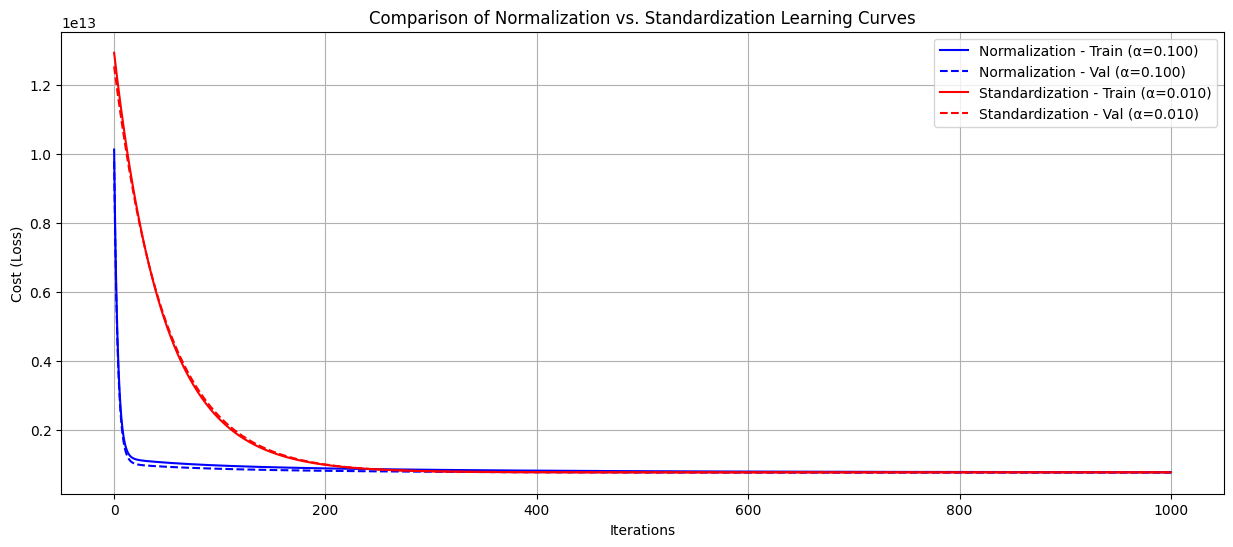


--- Final Model Comparison ---
Best Normalization Training Loss: 771371481089.015259
Best Normalization Validation Loss: 757587417934.863037 (Alpha: 0.1)
Best Standardization Training Loss: 766360968143.609619
Best Standardization Validation Loss: 767002482214.219849 (Alpha: 0.01)

Conclusion: Normalization achieved the lowest validation loss.


In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Housing.csv")

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X = data[features].to_numpy(dtype=float) ## selects only the specific columns relevant to problem 2
y = data['price'].to_numpy(dtype=float)

alphas = [0.1, 0.05, 0.02, 0.01 ]
iterations = 1001

def compute_cost(X,y, theta):
    m = len(y)
    errors = X.dot(theta) - y
    return (1.0/(2 * m)) * np.dot(errors, errors)

def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m_train = len(y_train)
    J_hist_train = np.zeros(iterations)
    J_hist_val = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        theta -= (alpha / m_train ) * (X_train.T.dot(errors))

        J_hist_train[i] = compute_cost(X_train, y_train, theta)
        J_hist_val[i] = compute_cost(X_val, y_val, theta)

    return theta, J_hist_train, J_hist_val

print("Starting Normalization")

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

m_norm = len(y)
X_b_normalized = np.c_[np.ones((m_norm,1)), X_normalized]## adding intercept term

X_train_normalized, X_val_normalized, y_train_normalized, y_val_normalized = train_test_split(X_b_normalized, y, test_size = 0.2, random_state = 14)

best_normalized= None

for a in alphas:
  theta0_normalized = np.zeros(X_train_normalized.shape[1])
  theta_normalized, J_hist_train_normalized, J_hist_val_normalized = gradient_descent(X_train_normalized, y_train_normalized, X_val_normalized, y_val_normalized, theta0_normalized, a, iterations)

  final_train_cost_normalized = J_hist_train_normalized[-1]
  final_val_cost_normalized = J_hist_val_normalized[-1]

  if best_normalized is None or final_val_cost_normalized < best_normalized["final_val_cost"]:
    best_normalized = {"theta": theta_normalized, "alpha": a, "J_hist_train": J_hist_train_normalized, "final_train_cost": final_train_cost_normalized, "J_hist_val": J_hist_val_normalized, "final_val_cost": final_val_cost_normalized}

  # Output Results for Normalization Model
print(f"Best Normalization Alpha: {best_normalized['alpha']} | Final Validation Cost: {best_normalized['final_val_cost']:.6f}")
print("\nMODEL COEFFICIENTS (NORMALIZATION):")
parameter_names = ["Intercept (θ0)"] + features
for name, theta_val in zip(parameter_names, best_normalized['theta']):
    print(f" {name:<15}: {theta_val:.8f}")


print("Starting Standardization")

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

m_stand = len(y)
X_b_stand = np.c_[np.ones((m_stand,1)), X_standardized]## adding intercept term

X_train_standardized, X_val_standardized, y_train_standardized, y_val_standardized = train_test_split(X_b_stand, y, test_size = 0.2, random_state = 14)

best_stand = None

for a in alphas:
  theta0_stand = np.zeros(X_train_standardized.shape[1])
  theta_stand, J_hist_train_stand, J_hist_val_stand = gradient_descent(X_train_standardized, y_train_standardized, X_val_standardized, y_val_standardized, theta0_stand, a, iterations)

  final_train_cost_stand = J_hist_train_stand[-1]
  final_val_cost_stand = J_hist_val_stand[-1]

  if best_stand is None or final_val_cost_stand < best_stand["final_val_cost"]:
    best_stand = {"theta": theta_stand, "alpha": a, "J_hist_train": J_hist_train_stand, "final_train_cost": final_train_cost_stand, "J_hist_val": J_hist_val_stand, "final_val_cost": final_val_cost_stand}

   # Output Results for Standardization Model
print(f"Best Standardization Alpha: {best_stand['alpha']} | Final Validation Loss: {best_stand['final_val_cost']:.6f}")
print("\nOPTIMAL MODEL COEFFICIENTS (STANDARDIZATION):")
for name, theta_val in zip(parameter_names, best_stand['theta']):
    print(f"  {name:<15}: {theta_val:.8f}")

## plots

plt.figure(figsize=(15, 6))

# Plot the best Normalization run
plt.plot(best_normalized['J_hist_train'], label=f'Normalization - Train (α={best_normalized["alpha"]:.3f})', color='blue')
plt.plot(best_normalized['J_hist_val'], label=f'Normalization - Val (α={best_normalized["alpha"]:.3f})', linestyle='--', color='blue')

# Plot the best Standardization run
plt.plot(best_stand['J_hist_train'], label=f'Standardization - Train (α={best_stand["alpha"]:.3f})', color='red')
plt.plot(best_stand['J_hist_val'], label=f'Standardization - Val (α={best_stand["alpha"]:.3f})', linestyle='--', color='red')

plt.title('Comparison of Normalization vs. Standardization Learning Curves')
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss)')
plt.legend()
plt.grid(True)
plt.show()

# Final Comparison of Best Models
print("\n--- Final Model Comparison ---")
print(f"Best Normalization Training Loss: {best_normalized['final_train_cost']:.6f}")
print(f"Best Normalization Validation Loss: {best_normalized['final_val_cost']:.6f} (Alpha: {best_normalized['alpha']})")
print(f"Best Standardization Training Loss: {best_stand['final_train_cost']:.6f}")
print(f"Best Standardization Validation Loss: {best_stand['final_val_cost']:.6f} (Alpha: {best_stand['alpha']})")

if best_stand['final_val_cost'] < best_normalized['final_val_cost']:
    print("\nConclusion: Standardization achieved the lowest validation loss.")
else:
    print("\nConclusion: Normalization achieved the lowest validation loss.")
